In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('Occupancy_Estimation.csv')

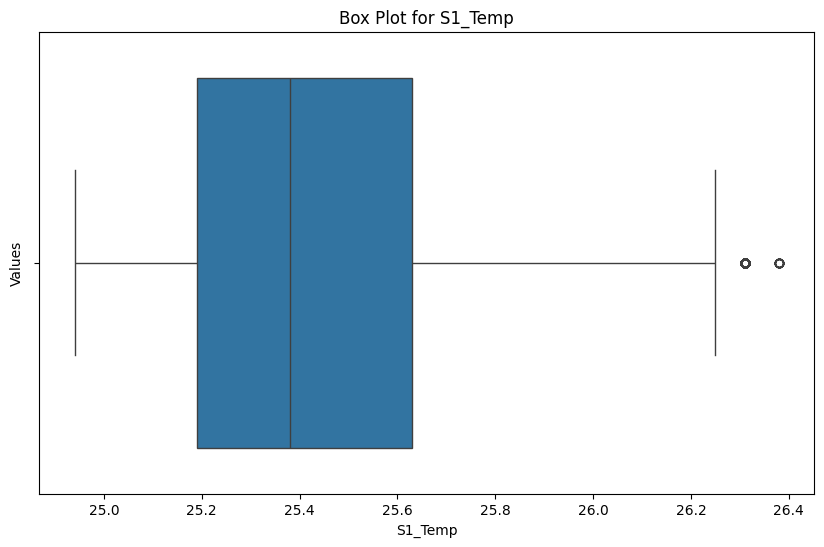

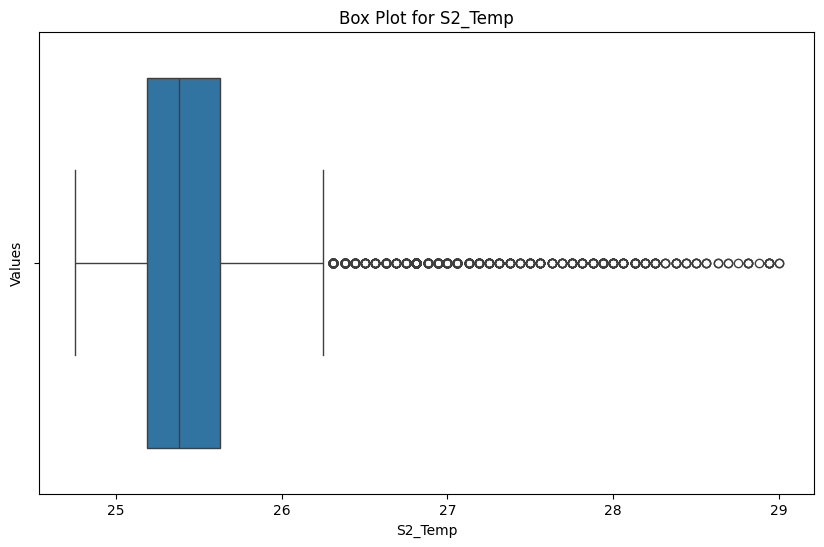

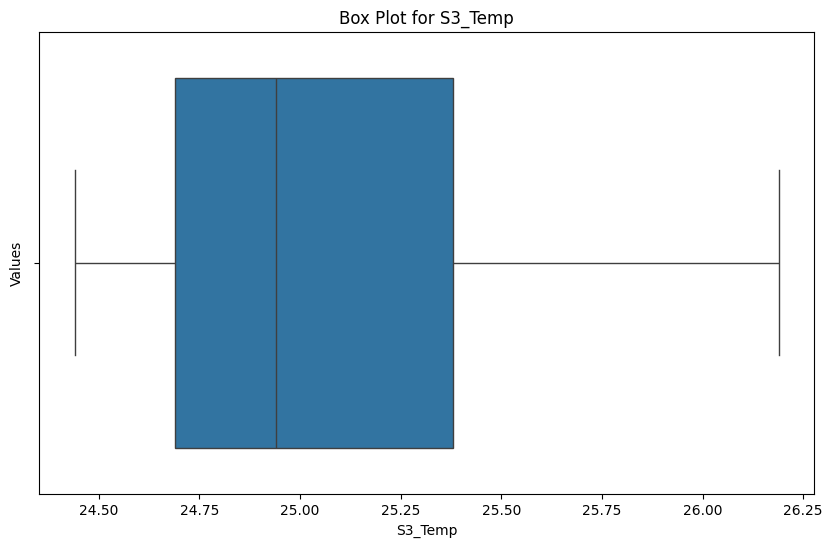

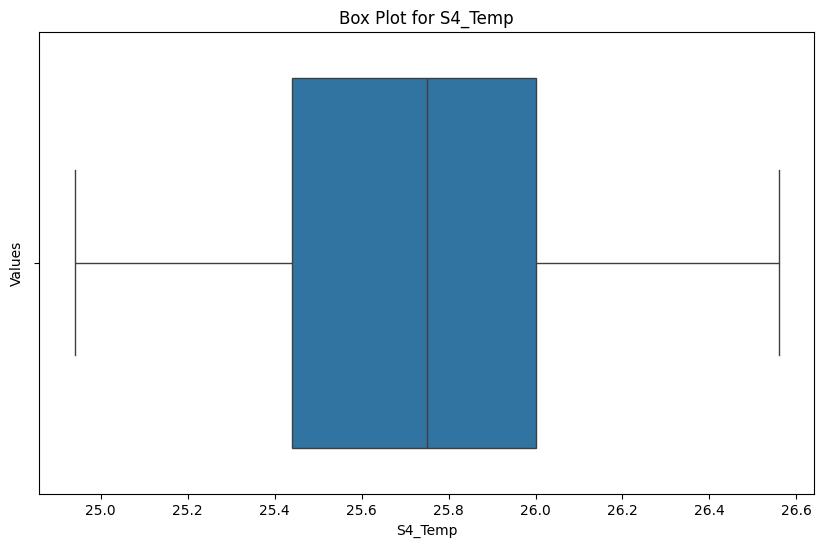

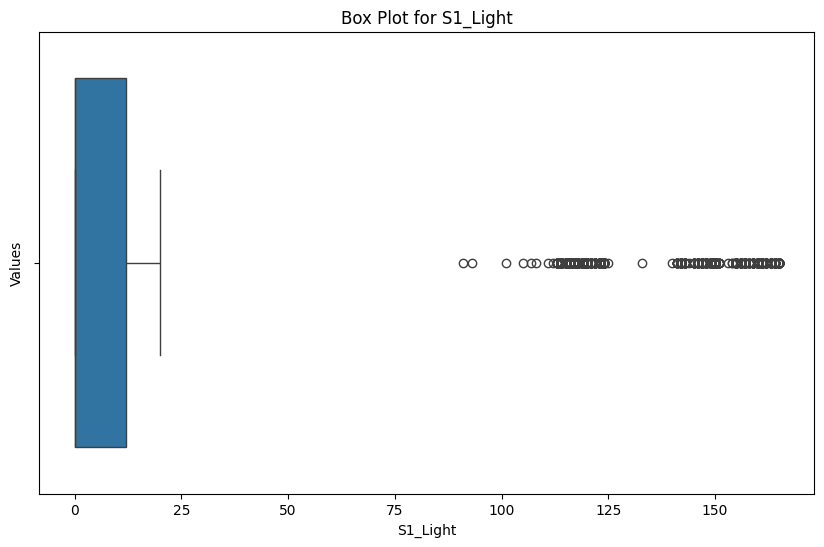

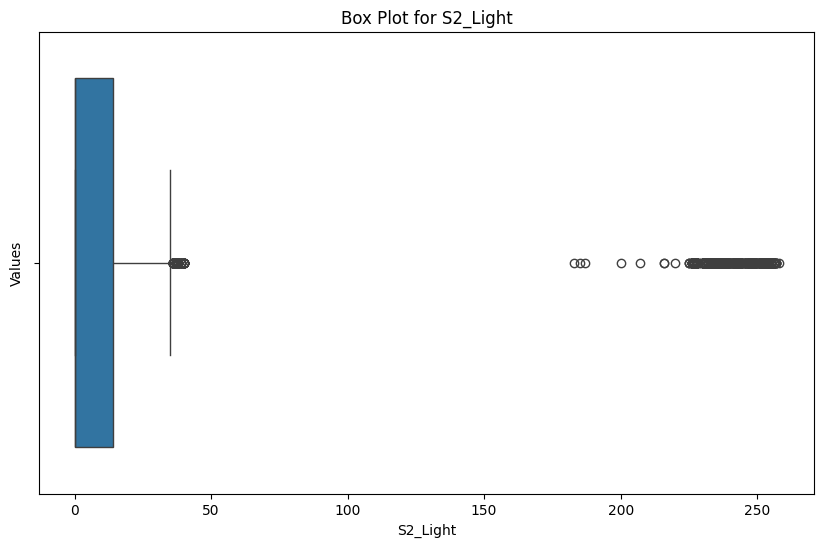

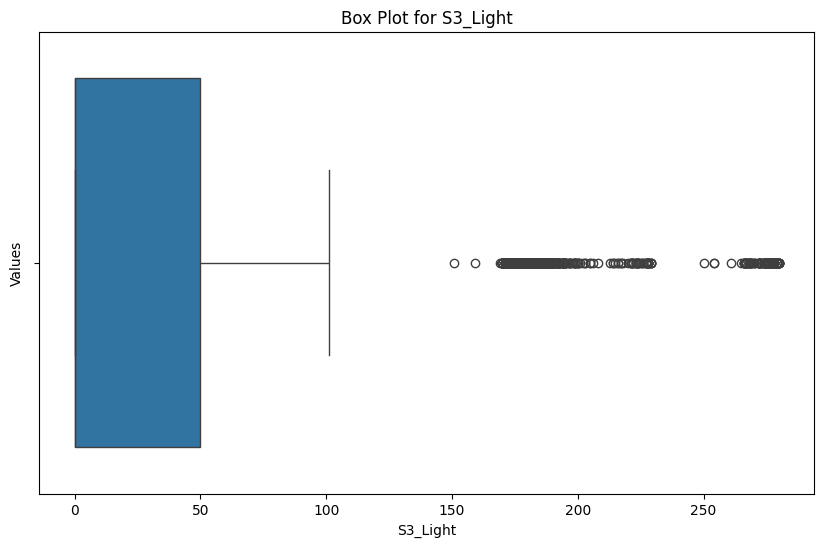

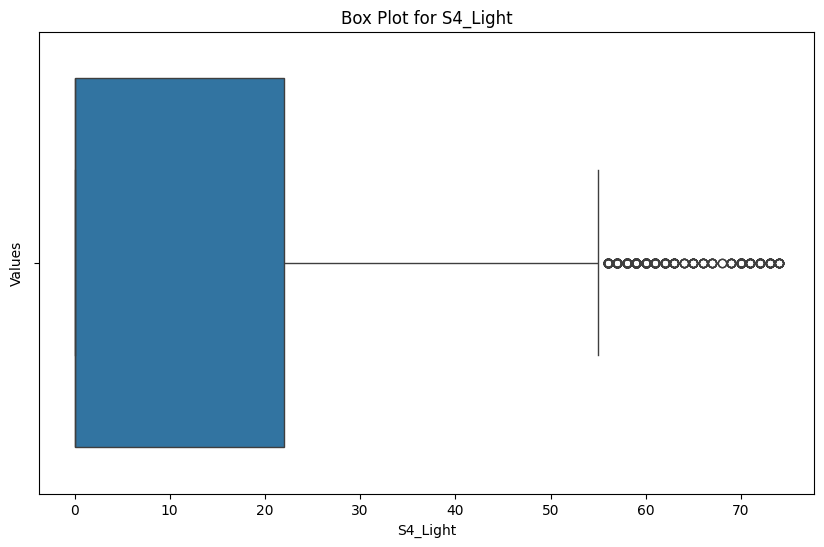

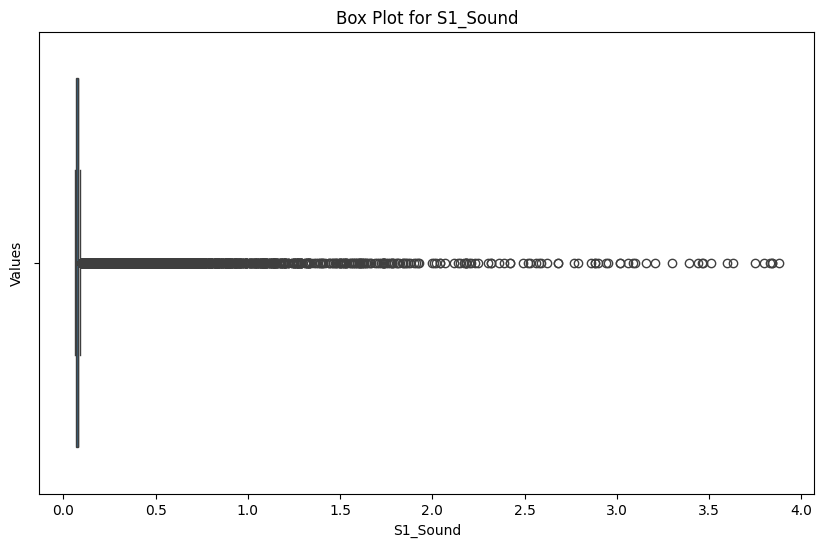

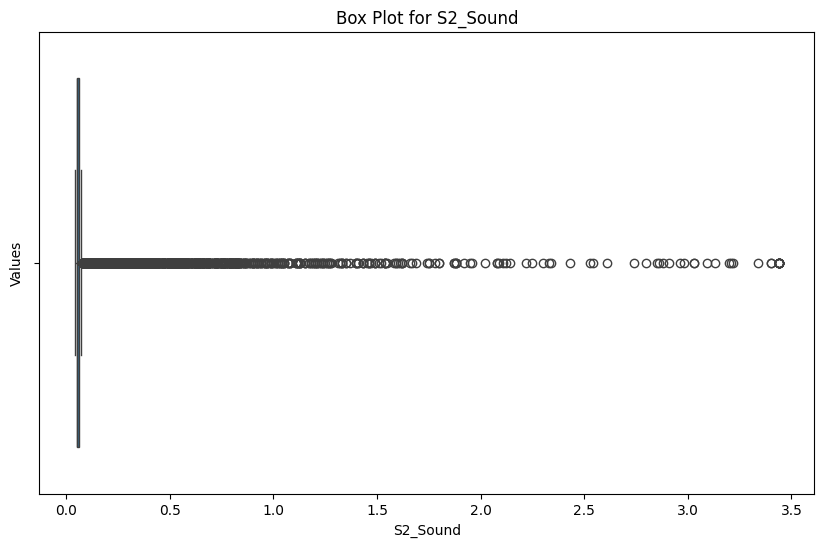

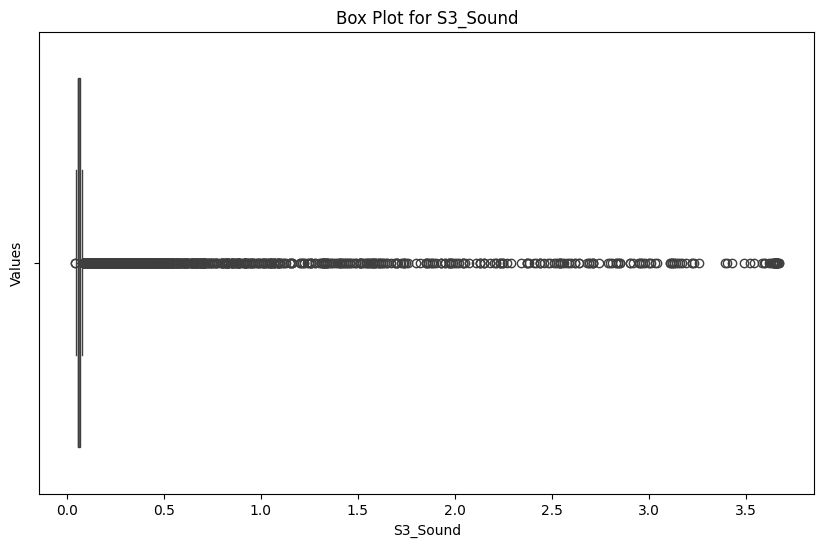

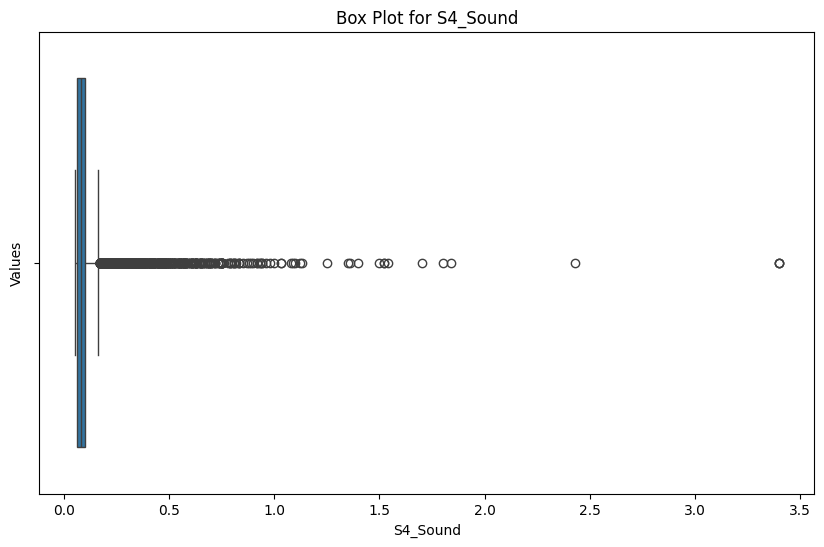

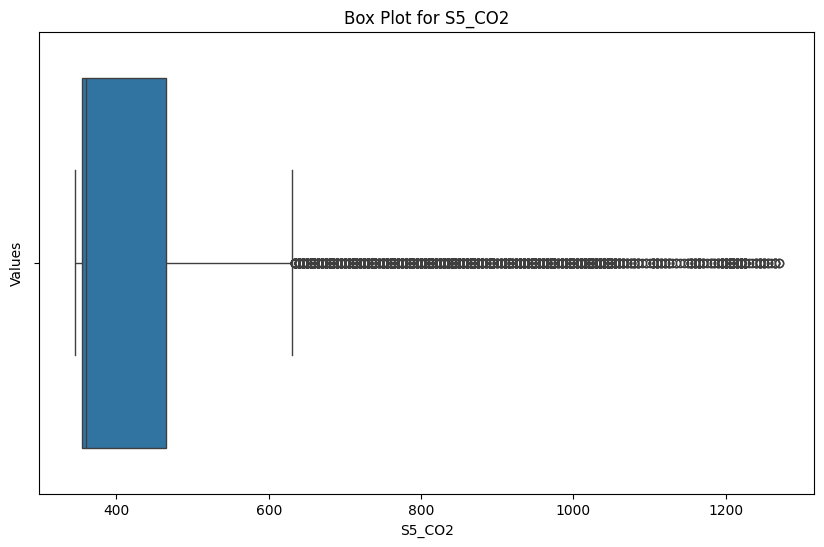

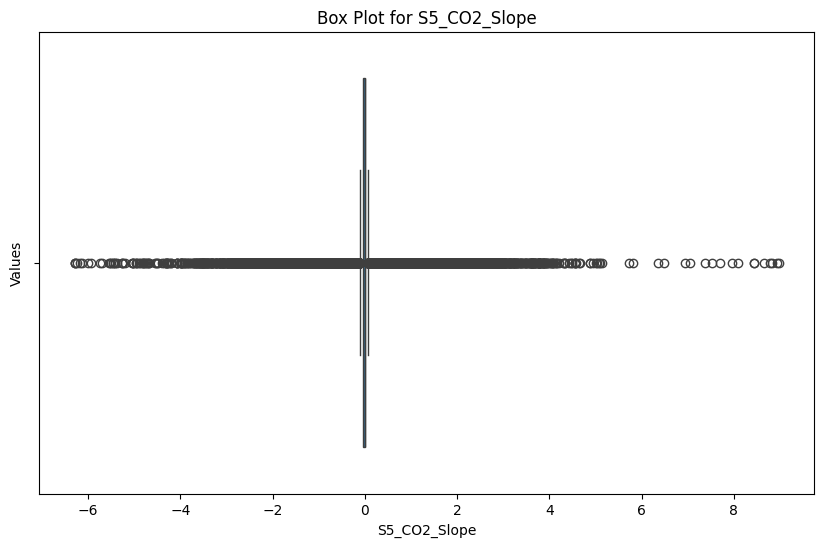

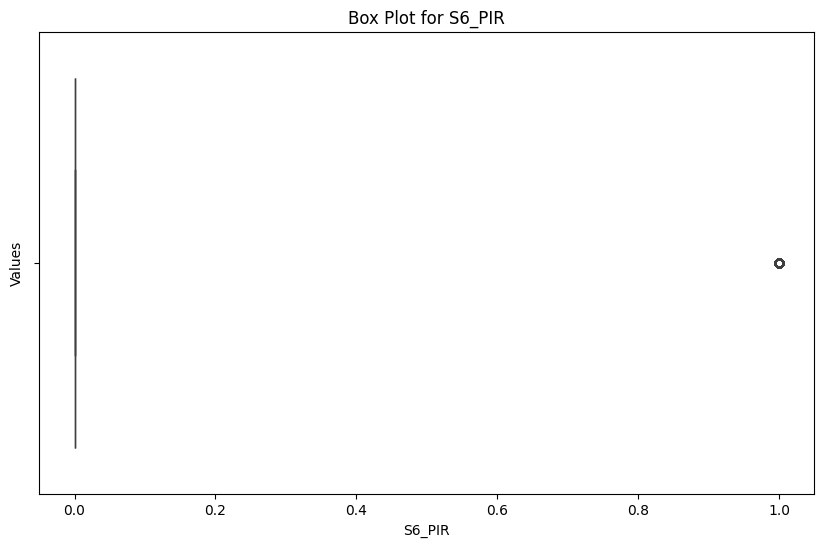

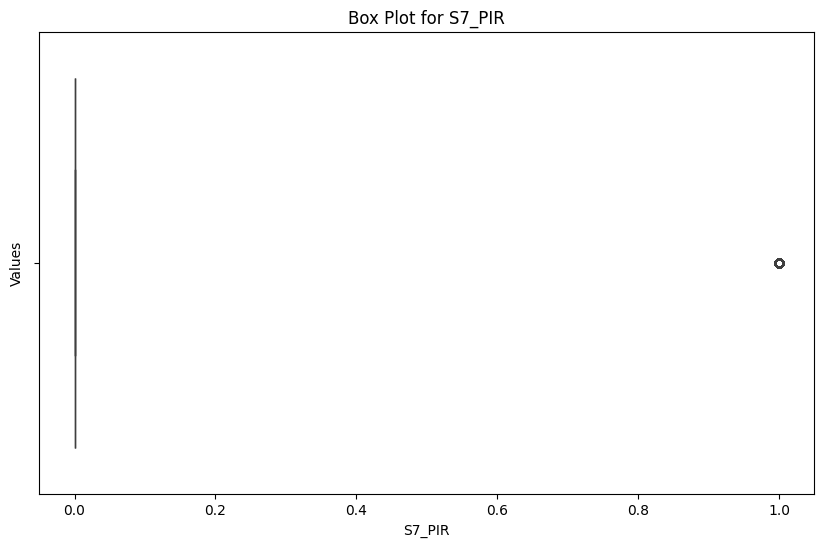

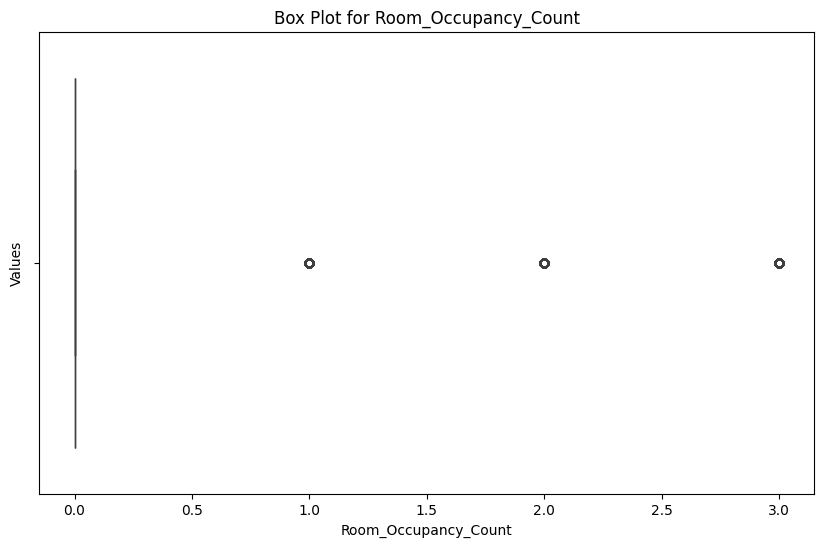

Statistics for column: S1_Temp
Main Statistics:
           count       mean       std    min    25%    50%    75%    max  \
S1_Temp  10129.0  25.454012  0.351351  24.94  25.19  25.38  25.63  26.38   

               sum  median       var       sem  
S1_Temp  257823.69   25.38  0.123447  0.003491  

Sequential Differences Statistics:
Minimum Difference: -0.129999999999999
Maximum Difference: 0.4400000000000013
Average Difference: 1.8759873617693297e-05

Counts of Sequential Differences:
S1_Temp
 0.00    8153
 0.06     441
-0.06     441
-0.07     279
 0.07     278
-0.06     268
 0.06     265
 0.13       1
-0.13       1
 0.44       1
Name: count, dtype: int64

--------------------------------------------------

Statistics for column: S2_Temp
Main Statistics:
           count       mean       std    min    25%    50%    75%   max  \
S2_Temp  10129.0  25.546059  0.586325  24.75  25.19  25.38  25.63  29.0   

               sum  median       var       sem  
S2_Temp  258756.03   25.38  0.3437

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already defined and contains the necessary data

# Handle special index types
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

# Reset the index and ensure column names are strings
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # Update columns to strings in case they are numbers

# Get the list of numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Initialize a dictionary to store statistics for each column
all_stats = {}

# Iterate through each numeric column and calculate statistics
for column in numeric_columns:
    # Main statistics
    stats = df[column].describe().to_frame().T

    # Additional statistical measures
    stats['sum'] = df[column].sum()
    stats['median'] = df[column].median()
    stats['var'] = df[column].var()
    stats['sem'] = df[column].sem()

    # Calculate sequential differences and their statistics
    sequential_diffs = df[column].diff().dropna()
    min_diff = sequential_diffs.min()
    max_diff = sequential_diffs.max()
    avg_diff = sequential_diffs.mean()
    diff_vals = sequential_diffs.value_counts().sort_values(ascending=False)

    # Store results in the dictionary
    all_stats[column] = {
        'main_stats': stats,
        'min_diff': min_diff,
        'max_diff': max_diff,
        'avg_diff': avg_diff,
        'diff_vals': diff_vals
    }

    # Create a box plot for the column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

# Display the statistics for all columns
for column, stats in all_stats.items():
    print(f"Statistics for column: {column}")
    print("Main Statistics:")
    print(stats['main_stats'])
    
    print("\nSequential Differences Statistics:")
    print(f"Minimum Difference: {stats['min_diff']}")
    print(f"Maximum Difference: {stats['max_diff']}")
    print(f"Average Difference: {stats['avg_diff']}")
    
    print("\nCounts of Sequential Differences:")
    print(stats['diff_vals'])
    print("\n" + "-"*50 + "\n")

